# Experiments with non-linearly learning memristors
The resistance of a memristor is controlled by giving negative and positive pulses. Unfortunately, these pulses do not linearly change the resistance value, and therefore the result of combinations of negative and positive pulses becomes unpredictable.

However, if we assume that in an ongoing learning situation a memristor receives a certain ratio of positive and negative pulses, the resistance value will eventually converge to a certain value. For example, if the memristor receives as many positive as negative pulses, it will eventually end up with a particular value for R (with an upper value after a negative pulse, and a lower value for a positive pulse). If we then change the ratio, for example two to one positive vs. negative pulses, this value will shift to a lower R value. Here we explore this with our standard memristor, first try the most extreme pulses: -4V and +1V. We then explore potential other values.


In [1]:
%cd ..
from memristor_learning.MemristorModels import MemristorAnoukBidirectional
from matplotlib import pyplot as plt
import numpy as np

m1 = MemristorAnoukBidirectional( c=-0.0498, d=-0.0 )
m2 = MemristorAnoukBidirectional(  )


# x1, y1 = m.plot_memristor_curve_exhaustive( V=-1, step=100, threshold=1000 )


def update_test_Thomas( Rtest, V, mem ):
    n = mem.compute_pulse_number( Rtest[ 0 ], V )
    r = mem.compute_resistance( n + 1, V )
    Rtest.insert( 0, r )


def update_test_Niels( Rtest, V, c=-0.0498 ):
    R0 = 100
    R1 = 2.5e8
    R3 = 1e9
    a = -0.0929
    b = -0.5324

    if V > 0:
        n = pow( (Rtest[ 0 ] - R0) / R1, (1 / (a + b * V)) )
        r = R0 + R1 * pow( n + 1, a + b * V )
    else:
        n = pow( (R3 - Rtest[ 0 ]) / R3, 1 / c )
        r = R3 - R3 * pow( n + 1, c )
    Rtest.insert( 0, r )


/Users/thomastiotto/PycharmProjects/Memristor_Learning


# First we do a standard experiment

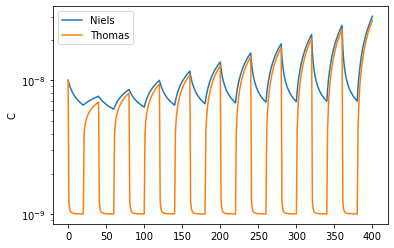

In [2]:
Rtest1 = [ 1e8 ]
Rtest2 = [ 1e8 ]
for i in range( 10 ):
    for j in range( 20 ):
        update_test_Thomas( Rtest1, -4, m1 )
        update_test_Thomas( Rtest2, -4, m2 )
    for j in range( 20 ):
        update_test_Thomas( Rtest1, ((i + 1) / 10.0), m1 )
        update_test_Thomas( Rtest2, ((i + 1) / 10.0), m2 )

Rtest1.reverse()
Rtest1 = [1.0/x for x in Rtest1]
plt.semilogy( Rtest1, label="Niels" )

Rtest2.reverse()
Rtest2 = [1.0/x for x in Rtest2]
plt.semilogy( Rtest2, label="Thomas"  )
plt.ylabel("C")
plt.legend()


Only one negative pulse is needed to bring the memristor back to what is basically zero:

In [3]:
print(Rtest1[0], Rtest1[1], Rtest1[20])

1e-08 9.515920356702275e-09 6.521098051390759e-09


# Now we try alternating -4 and 1 V and look for convergence

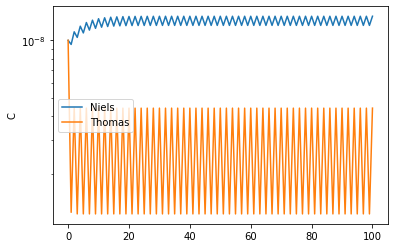

In [4]:
Rtest1 = [ 1e8 ]
Rtest2 = [ 1e8 ]
for j in range(50):
    update_test_Thomas( Rtest1, -4, m1 )
    update_test_Thomas( Rtest2, -4, m2 )
    update_test_Thomas( Rtest1, ((i + 1) / 10.0), m1 )
    update_test_Thomas( Rtest2, ((i + 1) / 10.0), m2 )

Rtest1.reverse()
Rtest1 = [1.0/x for x in Rtest1]
plt.semilogy( Rtest1, label="Niels"  )

Rtest2.reverse()
Rtest2 = [1.0/x for x in Rtest2]
plt.semilogy( Rtest2, label="Thomas" )
plt.ylabel("C")
plt.legend()

The variability around the average value is too high:

In [5]:
Rtest1 = np.array(Rtest1[20:-1])
Rtest2 = np.array(Rtest2[20:-1])

print(np.mean(Rtest1) )
print(np.ptp(Rtest1))

print(np.mean(Rtest2) )
print(np.ptp(Rtest2))

1.2666637015349442e-08
1.4216577156672685e-09
2.8230219014956354e-09
3.1812079973704514e-09


# Now try different frequencies of positive and negative, and see where the average R ends up

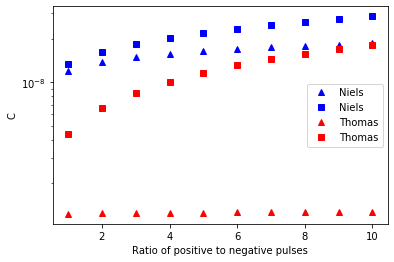

In [6]:
resultHigh1 = []
resultLow1 = []
resultHigh2 = []
resultLow2 = []
for j in range(10):
    Rtest1 = [1e8]
    Rtest2 = [1e8]
    for k in range(50):
        for i in range(j+1):
            update_test_Thomas( Rtest1, 1, m1 )
            update_test_Thomas( Rtest2, 1, m2 )
        update_test_Thomas( Rtest1, -4, m1 )
        update_test_Thomas( Rtest2, -4, m2 )
    #result.append((Rtest[0] + Rtest[1])/2)
    resultHigh1.append(Rtest1[0])
    resultHigh2.append(Rtest2[0])
    resultLow1.append(Rtest1[1])
    resultLow2.append(Rtest2[1])
    
resultHigh1 = [1.0/x for x in resultHigh1]
resultHigh2 = [1.0/x for x in resultHigh2]
resultLow1 = [1.0/x for x in resultLow1]
resultLow2 = [1.0/x for x in resultLow2]
plt.plot(range(1,11), resultHigh1, 'b^', range(1,11), resultLow1, 'bs', label="Niels"  )
plt.plot(range(1,11), resultHigh2, 'r^', range(1,11), resultLow2, 'rs', label="Thomas")
plt.ylabel("C")
plt.yscale("log")
plt.xlabel("Ratio of positive to negative pulses")
plt.legend()


Ok, explanation for the above graph: We are testing a regimen of one -4V pulse vs. 1 to 10 1V pulses, and see where we end up. The triangles are the minimum C we get (just after the -4V), and the squares the maximum (just after the nth 1V pulse). The result shows a nice spread of values, but the difference between high and low is not acceptable. So we have to experiment with different values, either shorter pulses or smaller voltages. But first we esplore the case with more negative pulse than positive pulses.



The spread between lowest and highest conductance is high even when doing 10 positive pulses for every negative one i.e., the negative pulse is too strong:

In [7]:
print(resultHigh1[-1]-resultLow1[-1])
print(resultHigh2[-1]-resultLow2[-1])

-1.0028027094786899e-08
-1.6799729551769307e-08


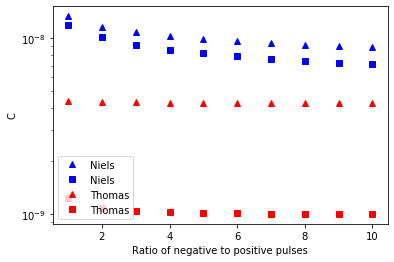

In [8]:
resultHigh1 = []
resultLow1 = []
resultHigh2 = []
resultLow2 = []
for j in range(10):
    Rtest1 = [1e8]
    Rtest2 = [1e8]
    for k in range(50):
        for i in range(j+1):
            update_test_Thomas( Rtest1, -4, m1 )
            update_test_Thomas( Rtest2, -4, m2 )
        update_test_Thomas( Rtest1, 1, m1 )
        update_test_Thomas( Rtest2, 1, m2 )
    #result.append((Rtest[0] + Rtest[1])/2)
    resultHigh1.append(Rtest1[0])
    resultHigh2.append(Rtest2[0])
    resultLow1.append(Rtest1[1])
    resultLow2.append(Rtest2[1])
resultHigh1 = [1.0/x for x in resultHigh1]
resultHigh2 = [1.0/x for x in resultHigh2]
resultLow1 = [1.0/x for x in resultLow1]
resultLow2 = [1.0/x for x in resultLow2]
plt.plot(range(1,11), resultHigh1, 'b^', range(1,11), resultLow1, 'bs', label="Niels"  )
plt.plot(range(1,11), resultHigh2, 'r^', range(1,11), resultLow2, 'rs', label="Thomas")
plt.ylabel("C")
plt.yscale("log")
plt.xlabel("Ratio of negative to positive pulses")
plt.legend()


Basically the same story as above, except that C range is not as high. -4V is just too strong.

# Smaller negative pulses
We assume we can get a smaller impact by either a lower voltage or a short pulse. Manipulate this by changing the c parameter




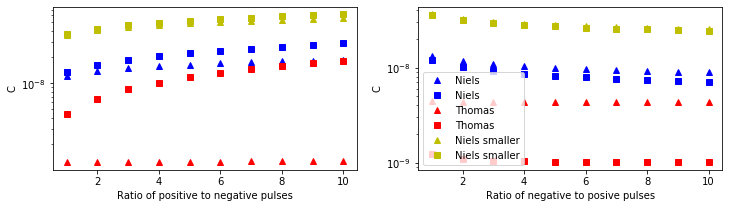

In [9]:
m3 = MemristorAnoukBidirectional( c=-0.01, d=-0.0 )

resultHigh1 = []
resultLow1 = []
resultHigh2 = []
resultLow2 = []
resultHigh3 = []
resultLow3 = []
for j in range(10):
    Rtest1 = [1e8]
    Rtest2 = [1e8]
    Rtest3 = [1e8]
    for k in range(50):
        for i in range(j+1):
            update_test_Thomas( Rtest1, 1, m1 )
            update_test_Thomas( Rtest2, 1, m2 )
            update_test_Thomas( Rtest3, 1, m3 )
        update_test_Thomas( Rtest1, -4, m1 )
        update_test_Thomas( Rtest2, -4, m2 )
        update_test_Thomas( Rtest3, -4, m3 )
    #result.append((Rtest[0] + Rtest[1])/2)
    resultHigh1.append(Rtest1[0])
    resultHigh2.append(Rtest2[0])
    resultHigh3.append(Rtest3[0])
    resultLow1.append(Rtest1[1])
    resultLow2.append(Rtest2[1])
    resultLow3.append(Rtest3[1])
resultHigh1 = [1.0/x for x in resultHigh1]
resultHigh2 = [1.0/x for x in resultHigh2]
resultHigh3 = [1.0/x for x in resultHigh3]
resultLow1 = [1.0/x for x in resultLow1]
resultLow2 = [1.0/x for x in resultLow2]
resultLow3 = [1.0/x for x in resultLow3]
plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.plot(range(1,11), resultHigh1, 'b^', range(1,11), resultLow1, 'bs', label="Niels"  )
plt.plot(range(1,11), resultHigh2, 'r^', range(1,11), resultLow2, 'rs', label="Thomas")
plt.plot(range(1,11), resultHigh3, 'y^', range(1,11), resultLow3, 'ys', label="Niels smaller")
plt.ylabel("C")
plt.yscale("log")
plt.xlabel("Ratio of positive to negative pulses")

resultHigh1 = []
resultLow1 = []
resultHigh2 = []
resultLow2 = []
resultHigh3 = []
resultLow3 = []
for j in range(10):
    Rtest1 = [1e8]
    Rtest2 = [1e8]
    Rtest3 = [1e8]
    for k in range(50):
        for i in range(j+1):
            update_test_Thomas( Rtest1, -4, m1 )
            update_test_Thomas( Rtest2, -4, m2 )
            update_test_Thomas( Rtest3, -4, m3 )
        update_test_Thomas( Rtest1, 1, m1 )
        update_test_Thomas( Rtest2, 1, m2 )
        update_test_Thomas( Rtest3, 1, m3 )
    #result.append((Rtest[0] + Rtest[1])/2)
    resultHigh1.append(Rtest1[0])
    resultHigh2.append(Rtest2[0])
    resultHigh3.append(Rtest3[0])
    resultLow1.append(Rtest1[1])
    resultLow2.append(Rtest2[1])
    resultLow3.append(Rtest3[1])
resultHigh1 = [1.0/x for x in resultHigh1]
resultHigh2 = [1.0/x for x in resultHigh2]
resultHigh3 = [1.0/x for x in resultHigh3]
resultLow1 = [1.0/x for x in resultLow1]
resultLow2 = [1.0/x for x in resultLow2]
resultLow3 = [1.0/x for x in resultLow3]
plt.subplot(122)
plt.plot(range(1,11), resultHigh1, 'b^', range(1,11), resultLow1, 'bs', label="Niels"  )
plt.plot(range(1,11), resultHigh2, 'r^', range(1,11), resultLow2, 'rs', label="Thomas")
plt.plot(range(1,11), resultHigh3, 'y^', range(1,11), resultLow3, 'ys', label="Niels smaller")
plt.ylabel("C")
plt.yscale("log")
plt.xlabel("Ratio of negative to posive pulses")
plt.legend()


With a c value of 0.01 things already look a lot nicer. In this setup, 280 microSiemens is the "zero-point". If we can somehow make an electronic circuit in which a C of 280 microSiemens corresponds to a weight of zero, we do not need a separate inhibiting memristor

In [10]:
print(resultHigh1[1],resultHigh1[1]-resultLow1[1])
print(resultHigh2[1],resultHigh2[1]-resultLow2[1])
print(resultHigh3[1],resultHigh3[1]-resultLow3[1])

1.1641464674714712e-08 1.5170424020153212e-09
4.3425233782697575e-09 3.2555212678347543e-09
3.2514332582775095e-08 8.472897006585042e-10


# 0.5V on positive pulses

Here a c of -0.01 looks pretty good combined with a positive V of 0.5

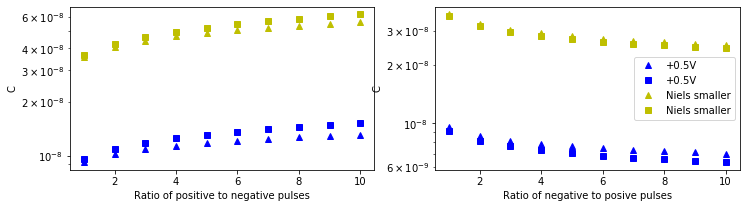

In [11]:
resultHigh1 = []
resultLow1 = []
resultHigh3 = []
resultLow3 = []
for j in range(10):
    Rtest1 = [1e8]
    Rtest3 = [1e8]
    for k in range(50):
        for i in range(j+1):
            update_test_Thomas( Rtest1, 0.5, m1 )
            update_test_Thomas( Rtest3, 1, m3 )
        update_test_Thomas( Rtest1, -4, m1 )
        update_test_Thomas( Rtest3, -4, m3 )
    resultHigh1.append(Rtest1[0])
    resultHigh3.append(Rtest3[0])
    resultLow1.append(Rtest1[1])
    resultLow3.append(Rtest3[1])
resultHigh1 = [1.0/x for x in resultHigh1]
resultHigh3 = [1.0/x for x in resultHigh3]
resultLow1 = [1.0/x for x in resultLow1]
resultLow3 = [1.0/x for x in resultLow3]
plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.plot(range(1,11), resultHigh1, 'b^', range(1,11), resultLow1, 'bs', label="+0.5V"  )
plt.plot(range(1,11), resultHigh3, 'y^', range(1,11), resultLow3, 'ys', label="Niels smaller")
plt.ylabel("C")
plt.yscale("log")
plt.xlabel("Ratio of positive to negative pulses")

resultHigh1 = []
resultLow1 = []
resultHigh3 = []
resultLow3 = []
for j in range(10):
    Rtest1 = [1e8]
    Rtest3 = [1e8]
    for k in range(50):
        for i in range(j+1):
            update_test_Thomas( Rtest1, -4, m1 )
            update_test_Thomas( Rtest3, -4, m3 )
        update_test_Thomas( Rtest1, 0.5, m1 )
        update_test_Thomas( Rtest3, 1, m3 )
    resultHigh1.append(Rtest1[0])
    resultHigh3.append(Rtest3[0])
    resultLow1.append(Rtest1[1])
    resultLow3.append(Rtest3[1])
resultHigh1 = [1.0/x for x in resultHigh1]
resultHigh3 = [1.0/x for x in resultHigh3]
resultLow1 = [1.0/x for x in resultLow1]
resultLow3 = [1.0/x for x in resultLow3]
plt.subplot(122)
plt.plot(range(1,11), resultHigh1, 'b^', range(1,11), resultLow1, 'bs', label="+0.5V"  )
plt.plot(range(1,11), resultHigh3, 'y^', range(1,11), resultLow3, 'ys', label="Niels smaller")
plt.ylabel("C")
plt.yscale("log")
plt.xlabel("Ratio of negative to posive pulses")
plt.legend()



The memristors are even better balanced:

In [12]:
print(resultHigh1[1],resultHigh1[1]-resultLow1[1])
print(resultHigh3[1],resultHigh3[1]-resultLow3[1])

8.646447797324703e-09 4.847475496680132e-10
3.2514332582775095e-08 8.472897006585042e-10


Basically the same story as above, except that C range is not as high. -4V is just too strong.